## Problem Statement

In the copper industry, accurate pricing decisions and lead classification are crucial for success. However, these tasks can be hindered by skewed and noisy data, leading to suboptimal manual predictions. To overcome this, we're using advanced techniques like machine learning regression and classification models to enhance accuracy and efficiency.

## Approach Overview

Here's a glimpse of how we tackled this challenge:

* Data Understanding: 
We delved into the data, identifying variable types and distributions, and addressing anomalies.
Data Preprocessing: 
* We handled missing values,  outliers, and transformed skewed data to prepare it for modeling.
Exploratory Data Analysis (EDA): 
We visually explored the data, identifying outliers and understanding the distribution of variables.
Feature Engineering: 
* We engineered new features and dropped correlated columns to enhance model performance.
Model Building and Evaluation: 
* We trained and evaluated regression and classification models, optimizing them for accuracy.
* Model GUI using Streamlit: 
We built an interactive Streamlit interface for real-time predictions.


## Detailed Approach

Let's delve into some key steps of our approach:

### EDA: 
 * We visualized our data to look for wrong data entry or the noise and treated them and plotted and skewness using Seaborn's kdeplot, boxplot to gain insights into data distribution.
* During visualization we were able to see the following :
 1) There are negative values in our target "selling price" which is not possible.
 2) so many irrelevant entries in material_ref column.
 3) country 78 is their market place since they got more orders from this country.
 4) country 113 is having high selling price.
 5) item type "SLAWR" is having high selling price.
 6) item type "PL" has almost won the customers.
 7) heavy skewness in target and thickness and quantity tons column.
 8) only one value is extremely low in customer column and all other values are in high end.
### Data Preprocessing:
 * We handled missing values in all the features.
 * Detected  outliers using IQR  and used Isolation Forest for detecting anomalies in each rows and transformed skewed variables with techniques like log transformation.

### Model Building and Evaluation: 
* For regression, 
we trained the model with and without scaling the features and got same results this will confirm that tree based models does not affect with scaling.
we predicted 'Selling_Price' using advanced techniques, achieving an accuracy of 97% 
* For classification, 
we handled imbalanced data using SMOTE and RandomUnderSampling and trained the model both with and without rresampling and compared the accuracy.
Then fine tuned,cross validated and evaluated the lead status predictions with an accuracy of 96%.

## Model GUI with Streamlit

The highlight of our project is the interactive Streamlit interface. Users can input variables and receive real-time predictions for 'Selling_Price' or 'Status' (Won/Lost). This user-friendly interface makes our models accessible and applicable.


## Conclusion

In conclusion, this project addresses challenges in the copper industry using machine learning and data analysis. Our models enhance accuracy in pricing decisions and lead classification. The skills gained during this project are not only applicable in manufacturing but also have broader implications in data-driven decision-making.

## Future Work

As we move forward, there's potential for further exploration:

Implementing more advanced algorithms for improved accuracy.
Exploring other industry-related challenges that machine learning can solve.
Collaborating with experts to gain deeper insights and refine the model

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import numpy as np

In [4]:
df=pd.read_excel("Copper_Set.xlsx")
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


#### Analysing the data

In [6]:
df.columns


Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [136]:
df.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

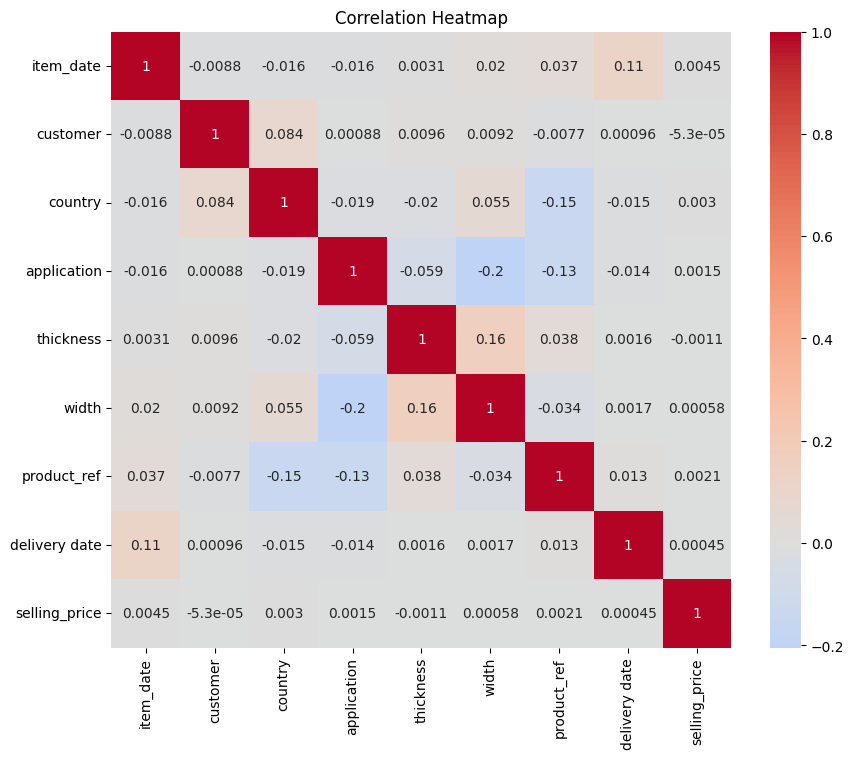

In [137]:
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show

#### renaming the columns

In [7]:
column_rename_mapping = {
    "item type": "item_type",
    "quantity tons": "quantity_tons",
    "delivery date":"delivery_date"
    # Add more columns to rename as needed
}

# Rename columns using the rename method
df.rename(columns=column_rename_mapping, inplace=True)

#### converting features in the correct format

In [139]:
df.head(2)

,id,item_date,quantity_tons,customer,country,status,item_type,application,thickness,width,material_ref,product_ref,delivery_date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.0
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.8,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.0


In [8]:
df["item_date"] = pd.to_datetime(df["item_date"], format="%Y%m%d",errors="coerce")
df["quantity_tons"] = pd.to_numeric(df["quantity_tons"], errors="coerce")
df.delivery_date=pd.to_datetime(df["delivery_date"],format="%Y%m%d",errors="coerce")

In [141]:
df.shape

(181673, 14)

In [142]:
df.head(2)

,id,item_date,quantity_tons,customer,country,status,item_type,application,thickness,width,material_ref,product_ref,delivery_date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.0
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.8,1210.0,0000000000000000000000000000000000104991,1668701718,2021-04-01,1047.0


#### Treating missing values

* checking indices of all null values to see whether null values occured in same indices.

In [9]:
null_indices = df.isnull().any()

for column, has_null in null_indices.items():
    if has_null:
        null_indices_in_column = df.index[df[column].isnull()]
        print(f"Column '{column}' has null values at indices: {null_indices_in_column.tolist()}")
    else:
        print(f"Column '{column}' does not have null values.")


Column 'id' has null values at indices: [26, 104566]
Column 'item_date' has null values at indices: [52, 104640, 105485]
Column 'quantity_tons' has null values at indices: [173086]
Column 'customer' has null values at indices: [104684]
Column 'country' has null values at indices: [104936, 104959, 105007, 105055, 108971, 108973, 108975, 108977, 108979, 108981, 108983, 108985, 108987, 108989, 108991, 108993, 108995, 108997, 108999, 109001, 109003, 109005, 109007, 109009, 118443, 118505, 131447, 131451]
Column 'status' has null values at indices: [105662, 105749]
Column 'item_type' does not have null values.
Column 'application' has null values at indices: [108971, 108973, 108975, 108977, 108979, 108981, 108983, 108985, 108987, 108989, 108991, 108993, 108995, 108997, 108999, 109001, 109003, 109005, 109007, 109009, 118443, 118505, 131447, 131451]
Column 'thickness' has null values at indices: [104895]
Column 'width' does not have null values.
Column 'material_ref' has null values at indice

In [144]:
won_count = (df['status'] == 'Won').sum()
lost_count = (df['status'] == 'Lost').sum()

In [145]:
won_count+lost_count

150448

In [146]:
#df=df[df.status.isin(["Won","Lost"])]

In [147]:
df.shape

(181673, 14)

* removing null values in all the features except material_ref as it is less than 1% combined together.

In [10]:
df.dropna(subset=['delivery_date','selling_price','item_date','customer','application','country',"quantity_tons","status","thickness"],inplace=True)

In [149]:
df.isnull().sum()

id                   2
item_date            0
quantity_tons        0
customer             0
country              0
status               0
item_type            0
application          0
thickness            0
width                0
material_ref     77883
product_ref          0
delivery_date        0
selling_price        0
dtype: int64

In [150]:
df.shape

(181633, 14)

In [11]:
id_counts = df['id'].value_counts()

# Filter for non-unique values
non_unique_ids = id_counts[id_counts > 1]

# Display non-unique id values and their counts
if not non_unique_ids.empty:
    print("Non-unique ID values:")
    for id_value, count in non_unique_ids.iteritems():
        print(f"ID {id_value} appears {count} times.")
else:
    print("No non-unique ID values found.")


No non-unique ID values found.


In [12]:
df.drop(['id'],axis=1,inplace=True) ## dropping id column as it takes unique values.

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181633 entries, 0 to 181672
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   item_date      181633 non-null  datetime64[ns]
 1   quantity_tons  181633 non-null  float64       
 2   customer       181633 non-null  float64       
 3   country        181633 non-null  float64       
 4   status         181633 non-null  object        
 5   item_type      181633 non-null  object        
 6   application    181633 non-null  float64       
 7   thickness      181633 non-null  float64       
 8   width          181633 non-null  float64       
 9   material_ref   103750 non-null  object        
 10  product_ref    181633 non-null  int64         
 11  delivery_date  181633 non-null  datetime64[ns]
 12  selling_price  181633 non-null  float64       
dtypes: datetime64[ns](2), float64(7), int64(1), object(3)
memory usage: 19.4+ MB


In [154]:
df.shape

(181633, 13)

In [155]:
df.isnull().sum()

item_date            0
quantity_tons        0
customer             0
country              0
status               0
item_type            0
application          0
thickness            0
width                0
material_ref     77883
product_ref          0
delivery_date        0
selling_price        0
dtype: int64

In [13]:
numeric_columns = df.select_dtypes(include=['number'])

# Check if any numeric columns have negative values
negative_columns = (numeric_columns < 0).any()

# Print the numeric columns with negative values
print("Numeric columns with negative values:")
print(negative_columns[negative_columns].index.tolist())

Numeric columns with negative values:
['quantity_tons', 'selling_price']


In [157]:
columns_to_check = ['quantity_tons', 'thickness', 'selling_price']

# Count negative values in each specified column
negative_counts = df[columns_to_check].apply(lambda x: (x < 0).sum())

# Display the counts of negative values
for column, count in negative_counts.items():
    print(f"Column '{column}' has {count} negative values.")


Column 'quantity_tons' has 4 negative values.
Column 'thickness' has 0 negative values.
Column 'selling_price' has 5 negative values.


In [158]:
df[df.thickness==0]

,item_date,quantity_tons,customer,country,status,item_type,application,thickness,width,material_ref,product_ref,delivery_date,selling_price


In [159]:
df_r=df.copy()

In [160]:
df[(df.selling_price < 0) | (df.quantity_tons < 0)]

,item_date,quantity_tons,customer,country,status,item_type,application,thickness,width,material_ref,product_ref,delivery_date,selling_price
28,2021-04-01,99.059199,30153510.0,30.0,Won,W,41.0,0.595,1207.0,GOO1208X595SP,611993,2021-04-01,-1160.0
44761,2021-02-04,101.397995,30198657.0,32.0,Won,W,41.0,1.250,1100.0,NaN,1721130331,2021-04-01,-730.0
44810,2021-02-03,12.225889,30157111.0,78.0,Won,W,41.0,0.750,1250.0,NaN,164141591,2021-04-01,-445.0
44865,2021-02-03,28.368563,30217604.0,27.0,Not lost for AM,PL,10.0,1.500,1270.0,BOB,164141591,2021-05-01,-25.0
105189,2020-11-12,5.280274,30209814.0,25.0,Won,W,15.0,6.000,1250.0,NaN,1671863738,2021-02-01,-336.0
105730,2020-11-11,-4.000000,30203192.0,27.0,Won,S,15.0,1.500,1500.0,NaN,1332077137,2021-01-01,723.0
131473,2020-10-02,-1.476794,30199273.0,27.0,Draft,S,10.0,0.600,1220.0,0000000000000000000000000000000000111598,611993,2021-01-01,22.0
181661,2020-07-02,-18.000000,30200854.0,25.0,Won,W,41.0,0.840,1220.0,0000000000000000000000000000000001000776,164141591,2020-07-01,590.0
181671,2020-07-02,-2000.000000,30200854.0,25.0,Won,W,41.0,0.850,1250.0,0000000000000000000000000000000001001149,164141591,2020-07-01,601.0


* having negative values in these two columns seems impossible.we will remove them

In [14]:
df=df[(df.selling_price > 0) & (df.quantity_tons > 0)]

In [162]:
df.shape

(181622, 13)

In [163]:
df5=df[(df["selling_price"]>0) & (df['thickness']>0) & (df['quantity_tons']>0)]

In [164]:
df5.shape

(181622, 13)

In [165]:
df.material_ref.nunique()

16561

In [15]:
df['material_ref'] = df['material_ref'].str.lstrip('0')

In [16]:
df.material_ref.nunique()

16560

In [168]:
df.material_ref.isnull().sum()

77878

In [169]:
df.material_ref.unique()

array(['DEQ1 S460MC', '104991', 'S0380700', ..., 'MAS65550',
       '4.11043_1060X5_BRE', '202006170005.IO.1.1'], dtype=object)

In [17]:
df['material_ref'].fillna(0, inplace=True)

In [171]:
df.isnull().sum()

item_date        0
quantity_tons    0
customer         0
country          0
status           0
item_type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery_date    0
selling_price    0
dtype: int64

### Feature Extraction

In [18]:
df["delivery_duration"] = (df["delivery_date"] - df["item_date"])

In [173]:
df.head(4)

,item_date,quantity_tons,customer,country,status,item_type,application,thickness,width,material_ref,product_ref,delivery_date,selling_price,delivery_duration
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,91 days
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00,0 days
2,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33,-90 days
3,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00,-90 days


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181622 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype          
---  ------             --------------   -----          
 0   item_date          181622 non-null  datetime64[ns] 
 1   quantity_tons      181622 non-null  float64        
 2   customer           181622 non-null  float64        
 3   country            181622 non-null  float64        
 4   status             181622 non-null  object         
 5   item_type          181622 non-null  object         
 6   application        181622 non-null  float64        
 7   thickness          181622 non-null  float64        
 8   width              181622 non-null  float64        
 9   material_ref       181622 non-null  object         
 10  product_ref        181622 non-null  int64          
 11  delivery_date      181622 non-null  datetime64[ns] 
 12  selling_price      181622 non-null  float64        
 13  delivery_duration  181622 non

In [19]:
df['delivery_duration'] = df['delivery_duration'].astype(str)
df['delivery_duration'] = df['delivery_duration'].str.replace('days', '')
df['delivery_duration'] = pd.to_numeric(df['delivery_duration'])

ther are so many negative values in delivery duration.we will check for anomaly and feed it to the machine

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181622 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   item_date          181622 non-null  datetime64[ns]
 1   quantity_tons      181622 non-null  float64       
 2   customer           181622 non-null  float64       
 3   country            181622 non-null  float64       
 4   status             181622 non-null  object        
 5   item_type          181622 non-null  object        
 6   application        181622 non-null  float64       
 7   thickness          181622 non-null  float64       
 8   width              181622 non-null  float64       
 9   material_ref       181622 non-null  object        
 10  product_ref        181622 non-null  int64         
 11  delivery_date      181622 non-null  datetime64[ns]
 12  selling_price      181622 non-null  float64       
 13  delivery_duration  181622 non-null  int64   

In [20]:
numeric_columns = df.select_dtypes(include=['number'])

# Check if any numeric columns have negative values
negative_columns = (numeric_columns < 0).any()

# Print the numeric columns with negative values
print("Numeric columns with negative values:")
print(negative_columns[negative_columns].index.tolist())

Numeric columns with negative values:
['delivery_duration']


In [178]:
positive_count = (df["delivery_duration"] > 0).sum()
negative_count = (df["delivery_duration"] < 0).sum()

# Display the counts
print("Number of positive values:", positive_count)
print("Number of negative values:", negative_count)

Number of positive values: 165059
Number of negative values: 16105


* there are lots of negative values in delivery duration.

* negative values are not possible in delivery duration.it might be a error in dats entry or some other reason. Let us check for anomaly.

In [179]:
df.head(2)

,item_date,quantity_tons,customer,country,status,item_type,application,thickness,width,material_ref,product_ref,delivery_date,selling_price,delivery_duration
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.0,91
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.8,1210.0,104991,1668701718,2021-04-01,1047.0,0


In [180]:
df.drop(["item_date","delivery_date"],axis=1,inplace=True)

In [181]:
df.head(2)

,quantity_tons,customer,country,status,item_type,application,thickness,width,material_ref,product_ref,selling_price,delivery_duration
0,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,DEQ1 S460MC,1670798778,854.0,91
1,768.024839,30202938.0,25.0,Won,W,41.0,0.8,1210.0,104991,1668701718,1047.0,0


## handling skewness

In [185]:
skewness = df.select_dtypes(include=[np.number]).apply(lambda x: x.skew())

In [186]:
skewness=pd.DataFrame(skewness)
skewness

,0
quantity_tons,424.631202
customer,-149.087630
country,0.753534
application,0.724378
thickness,15.302959
width,0.374825
product_ref,1.015061
selling_price,301.345781
delivery_duration,-0.432328


* we can observe skewness is high in quantity_tons ,selling price,thickness and customer column. lets treat them and leave other columns.Because we are going to use tree based models and they dont get affected by skewness as much.

<function matplotlib.pyplot.show(close=None, block=None)>

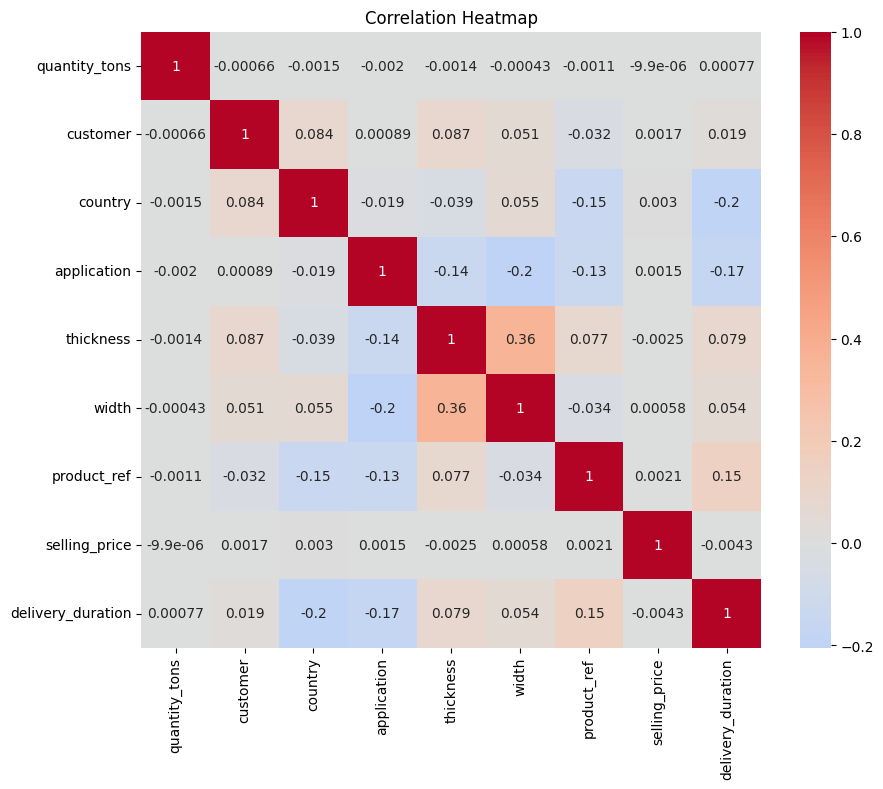

In [23]:
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show

* we can observe after treating  missing values the correlation for features has changed.

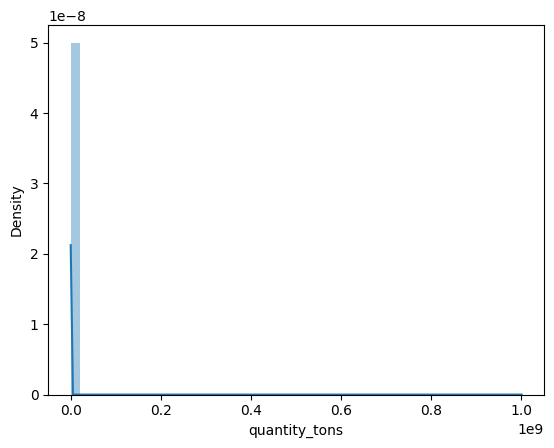

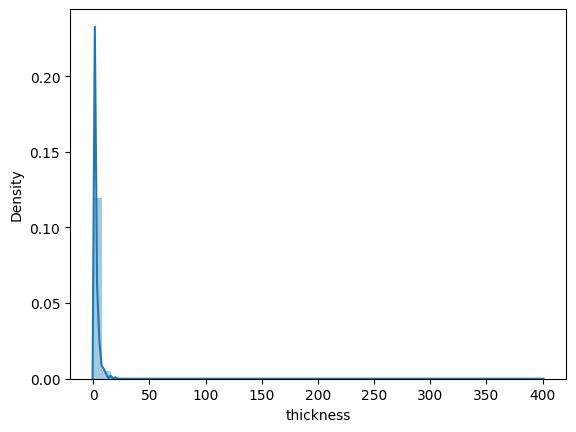

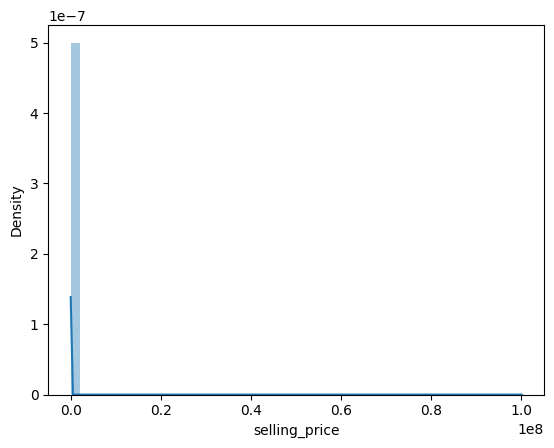

In [ ]:
sns.distplot(df["quantity_tons"])
plt.show()
sns.distplot(df["thickness"])
plt.show()
sns.distplot(df["selling_price"])
plt.show()

In [188]:
df["thickness_log"]=np.log(df.thickness)
df["quantity_tons_log"]=np.log(df.quantity_tons)
df["selling_price_log"]=np.log(df.selling_price)

In [189]:
from scipy.stats import skew
(df.thickness_log).skew(),df["quantity_tons_log"].skew(),df["selling_price_log"].skew()

(0.34912609383236665, -0.06876247672713233, -5.342786681271056)

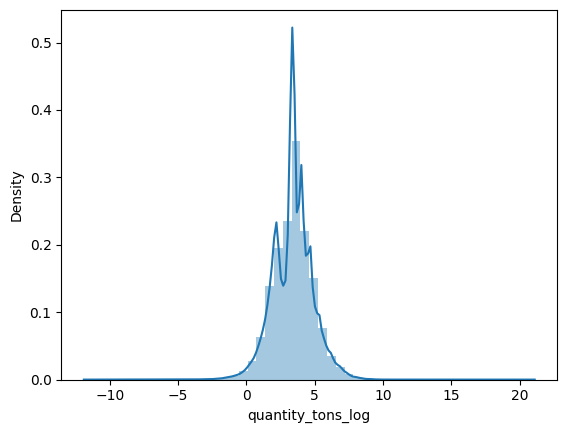

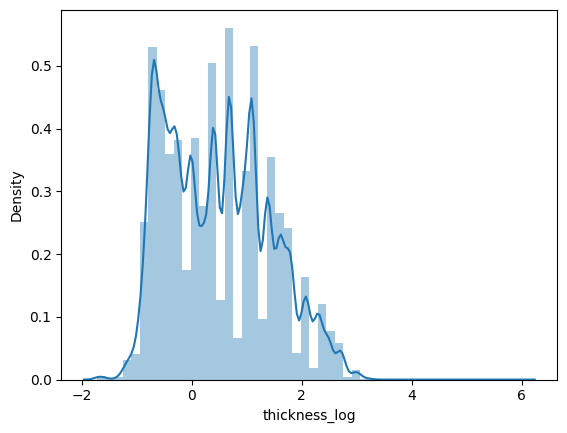

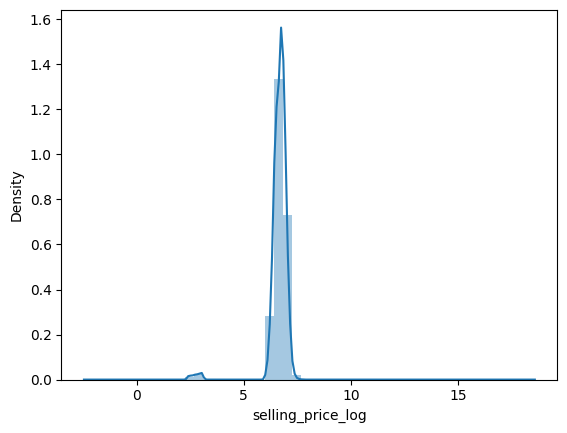

In [ ]:
sns.distplot(df["quantity_tons_log"])
plt.show()
sns.distplot(df["thickness_log"])
plt.show()
sns.distplot(df["selling_price_log"])
plt.show()

* we can see skewness has reduced to a great extent

#### handling customer column

In [190]:
df.customer=df.customer.astype(int)

In [ ]:
df_customer_log=np.log(df.customer)

<Axes: xlabel='customer', ylabel='Density'>

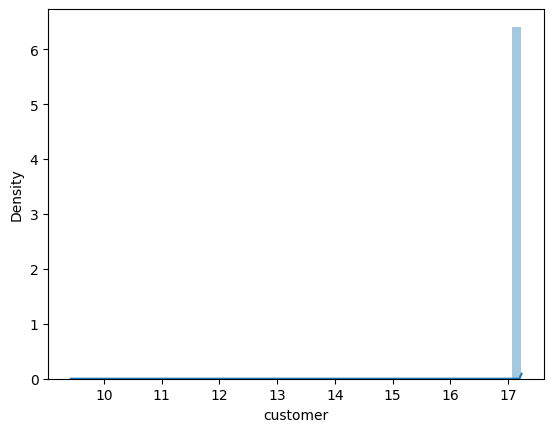

In [ ]:
sns.distplot(df_customer_log)

In [191]:
(df_customer_log).skew()

-415.7758120120081

In [192]:
df.customer.min(),df.customer.max()

(12458, 30408185)

In [193]:
df[df["customer"]<30000].head(2)

,quantity_tons,customer,country,status,item_type,application,thickness,width,material_ref,product_ref,selling_price,delivery_duration,thickness_log,quantity_tons_log,selling_price_log
45238,29.944622,12458,26.0,Lost,S,15.0,3.1,1400.0,0,640405,935.0,148,1.131402,3.39935,6.840547


In [ ]:
df[df["customer"]>30000000].head(2)

,quantity_tons,customer,country,status,item_type,application,thickness,width,material_ref,product_ref,selling_price,delivery_duration,thickness_log,quantity_tons_log,selling_price_log
0,54.151139,30156308,28.0,Won,W,10.0,2.0,1500.0,DEQ1 S460MC,1670798778,854.0,91,0.693147,3.991779,6.749931
1,768.024839,30202938,25.0,Won,W,41.0,0.8,1210.0,104991,1668701718,1047.0,0,-0.223144,6.643822,6.953684


* we can only one value in customer column is low (i.e, 12548) all other columns are greather thn 30million.
* let us remove this column and check the skewness.

In [194]:
df8=df.copy()

In [195]:
df=df[df['customer']>30000000]

In [196]:
df.customer.skew()

0.9058508941744366

* we can see skewness has reduced now.

<Axes: xlabel='customer', ylabel='Density'>

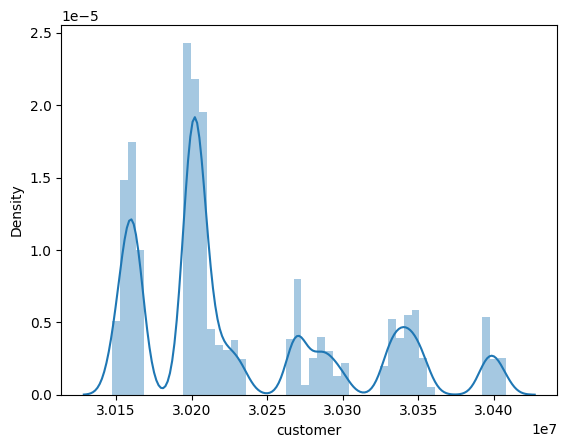

In [ ]:
sns.distplot(df["customer"])

In [197]:
df1=df.copy()

In [ ]:
df1.sample(5)

,quantity_tons,customer,country,status,item_type,application,thickness,width,material_ref,product_ref,selling_price,delivery_duration,thickness_log,quantity_tons_log,selling_price_log
118359,12.251973,30205312,32.0,Not lost for AM,W,10.0,0.8,1250.0,"DC01-1250X1,5 CCPU",628377,650.0,70,-0.223144,2.505687,6.476972
44756,1407.724867,30198657,32.0,Won,W,41.0,0.7,1300.0,0,1721130331,771.0,56,-0.356675,7.249730,6.647688
70014,94.985359,30160005,78.0,Won,W,41.0,1.1,1154.0,K DX51D+Z PROFILES,164141591,801.0,55,0.095310,4.553723,6.685861
12544,2.414675,30161088,78.0,Won,W,10.0,1.5,1250.0,S280GD+Z275 NORMAL G,164141591,994.0,76,0.405465,0.881565,6.901737
74104,138.972183,30354392,26.0,Won,W,2.0,6.0,1500.0,0,1671863738,677.0,16,1.791759,4.934274,6.517671


In [ ]:
#df.drop(["delivery_date","item_date"],axis=1,inplace=True)

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181621 entries, 0 to 181672
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   quantity_tons      181621 non-null  float64
 1   customer           181621 non-null  int64  
 2   country            181621 non-null  float64
 3   status             181621 non-null  object 
 4   item_type          181621 non-null  object 
 5   application        181621 non-null  float64
 6   thickness          181621 non-null  float64
 7   width              181621 non-null  float64
 8   material_ref       181621 non-null  object 
 9   product_ref        181621 non-null  int64  
 10  selling_price      181621 non-null  float64
 11  delivery_duration  181621 non-null  int64  
 12  thickness_log      181621 non-null  float64
 13  quantity_tons_log  181621 non-null  float64
 14  selling_price_log  181621 non-null  float64
dtypes: float64(9), int64(3), object(3)
memory usage: 22

### outlier detection

In [199]:
# Calculate the IQR for each numeric column
numeric_columns = df.select_dtypes(include=['number'])
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)
IQR = Q3 - Q1

# Define a threshold to identify outliers (typically 1.5 times the IQR)
outlier_threshold = 1.5

# Detect outliers using the IQR method
outliers = (numeric_columns < (Q1 - outlier_threshold * IQR)) | (numeric_columns > (Q3 + outlier_threshold * IQR))

# Print columns with detected outliers
outlier_columns = numeric_columns.columns[outliers.any()]
print("Columns with detected outliers:")
print(outlier_columns)


Columns with detected outliers:
Index(['quantity_tons', 'customer', 'application', 'thickness', 'width',
       'selling_price', 'delivery_duration', 'thickness_log',
       'quantity_tons_log', 'selling_price_log'],
      dtype='object')


* we are not going to treat the outliers since they carry some informtion.

In [ ]:
df.describe()

,quantity_tons,customer,country,application,thickness,width,product_ref,selling_price,delivery_duration,thickness_log,quantity_tons_log,selling_price_log
count,1.816210e+05,1.816210e+05,181621.000000,181621.000000,181621.000000,181621.000000,1.816210e+05,1.816210e+05,181621.000000,181621.000000,181621.000000,181621.000000
mean,5.876564e+03,3.023267e+07,44.893922,25.615727,2.550490,1295.265426,4.740178e+08,1.918481e+03,59.990667,0.480168,3.392015,6.626299
std,2.349411e+06,7.130853e+04,24.404508,17.753999,2.976513,261.652145,7.175347e+08,3.318422e+05,46.816327,0.933527,1.444970,0.564058
min,1.000000e-05,3.014762e+07,25.000000,2.000000,0.180000,1.000000,6.117280e+05,1.000000e-01,-689.000000,-1.714798,-11.512925,-2.302585
25%,1.096872e+01,3.019688e+07,26.000000,10.000000,0.700000,1179.000000,6.119930e+05,6.690000e+02,28.000000,-0.356675,2.395048,6.505784
50%,3.036408e+01,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,8.120000e+02,60.000000,0.405465,3.413260,6.699500
75%,6.716228e+01,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,9.530000e+02,97.000000,1.098612,4.207112,6.859615
max,1.000000e+09,3.040818e+07,113.000000,99.000000,400.000000,2990.000000,1.722208e+09,1.000010e+08,448.000000,5.991465,20.723266,18.420691


## data encoding

In [200]:
df2=df.copy()

In [201]:
dff=df[df["status"].isin(["Won","Lost"])]## to use for classifer model

In [ ]:
df.head()

,quantity_tons,customer,country,status,item_type,application,thickness,width,material_ref,product_ref,selling_price,delivery_duration,thickness_log,quantity_tons_log,selling_price_log
0,54.151139,30156308,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,854.00,91,0.693147,3.991779,6.749931
1,768.024839,30202938,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,1047.00,0,-0.223144,6.643822,6.953684
2,386.127949,30153963,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,644.33,-90,-0.967584,5.956169,6.468211
3,202.411065,30349574,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,768.00,-90,0.832909,5.310301,6.643790
4,785.526262,30211560,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,577.00,-31,1.386294,6.666354,6.357842


In [ ]:
df.status.unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable'], dtype=object)

In [202]:
df.drop("material_ref",axis=1,inplace=True)

In [ ]:
#df["status_enc"]=df.status.map({"Won":1,"Lost":0,'Draft':2,'To be approved':3,'Not lost for AM':4,'Wonderful':5,'Revised':6,'Offered':7,'Offerable':8})

In [ ]:
#df["item_type_enc"]=df.item_type.map({"W":1,"WI":0,"S":2,"Others":6,"PL":3,"IPL":4,"SLAWR":5})

In [203]:
pip install category_encoders


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [245]:
datas=df.drop(["thickness","selling_price","selling_price_log","quantity_tons"],axis=1)

In [246]:
data.head(2)

,customer,country,item_type,application,width,product_ref,delivery_duration,thickness_log,quantity_tons_log,selling_price_log
0,30156308,28.0,W,10.0,1500.0,1670798778,91,0.693147,3.991779,6.749931
1,30202938,25.0,W,41.0,1210.0,1668701718,0,-0.223144,6.643822,6.953684


In [247]:
import category_encoders as ce
encode_bin=ce.BinaryEncoder(cols=["status","item_type"],return_df=True)
df_encoded=encode_bin.fit_transform(datas)

In [205]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181621 entries, 0 to 181672
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   quantity_tons      181621 non-null  float64
 1   customer           181621 non-null  int64  
 2   country            181621 non-null  float64
 3   status_0           181621 non-null  int64  
 4   status_1           181621 non-null  int64  
 5   status_2           181621 non-null  int64  
 6   status_3           181621 non-null  int64  
 7   item_type_0        181621 non-null  int64  
 8   item_type_1        181621 non-null  int64  
 9   item_type_2        181621 non-null  int64  
 10  application        181621 non-null  float64
 11  thickness          181621 non-null  float64
 12  width              181621 non-null  float64
 13  product_ref        181621 non-null  int64  
 14  selling_price      181621 non-null  float64
 15  delivery_duration  181621 non-null  int64  
 16  th

In [ ]:
dff.shape

(150427, 15)

In [ ]:
df_encoded.head(2)

,quantity_tons,customer,country,status_0,status_1,status_2,status_3,item_type_0,item_type_1,item_type_2,...,material_ref_11,material_ref_12,material_ref_13,material_ref_14,product_ref,selling_price,delivery_duration,thickness_log,quantity_tons_log,selling_price_log
0,54.151139,30156308,28.0,0,0,0,1,0,0,1,...,0,0,0,1,1670798778,854.0,91,0.693147,3.991779,6.749931
1,768.024839,30202938,25.0,0,0,0,1,0,0,1,...,0,0,1,0,1668701718,1047.0,0,-0.223144,6.643822,6.953684


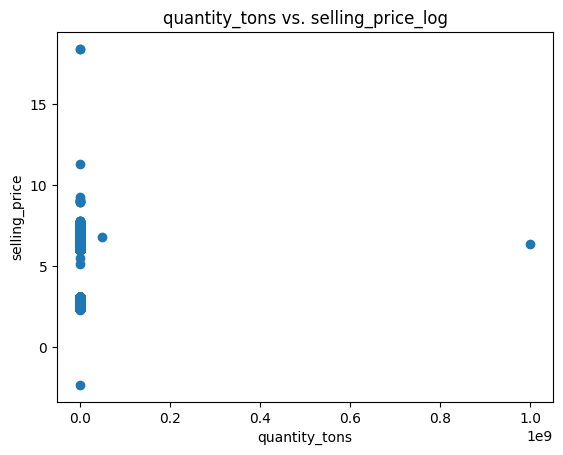

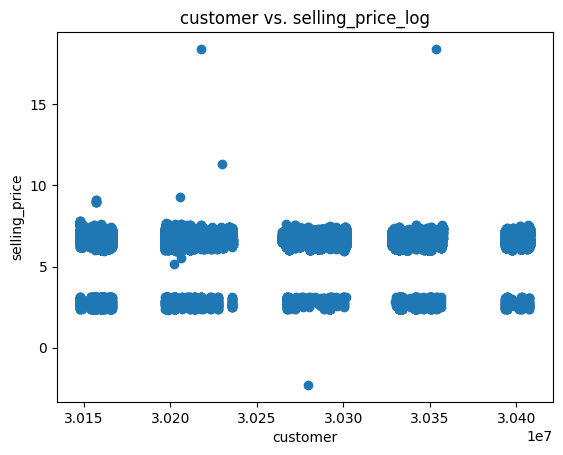

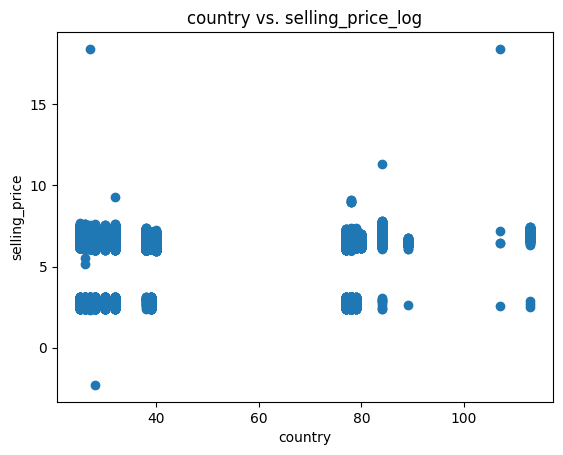

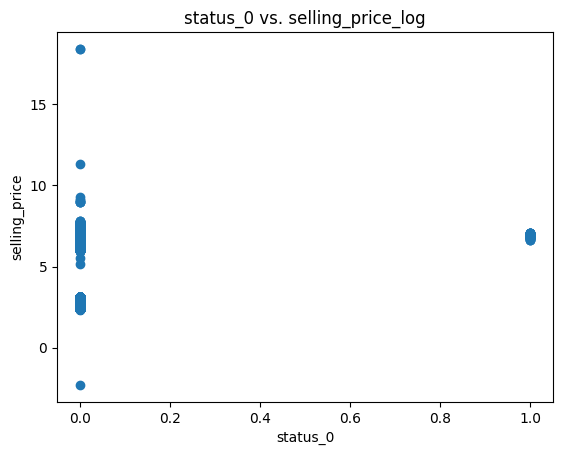

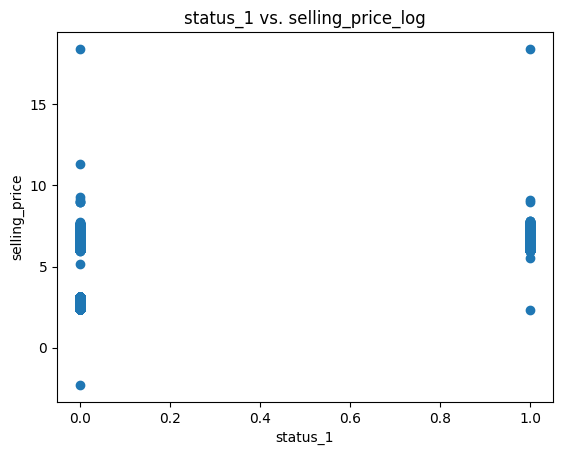

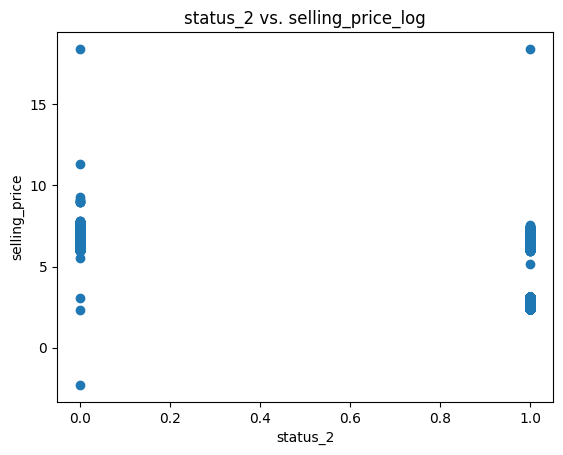

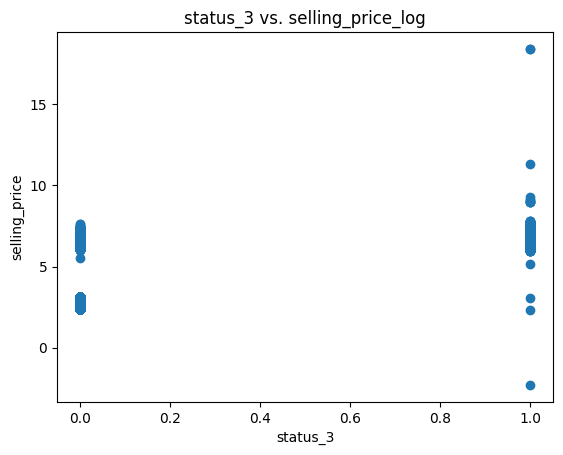

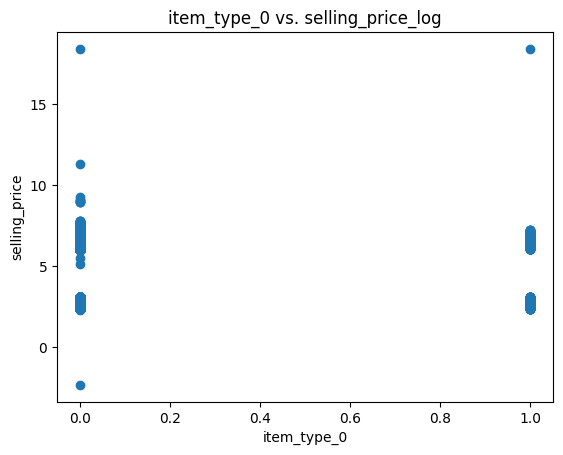

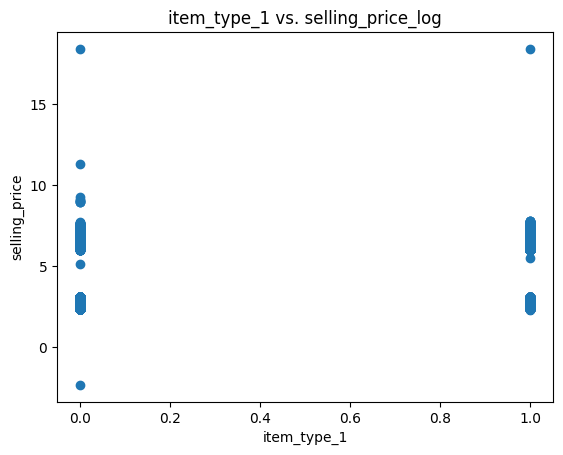

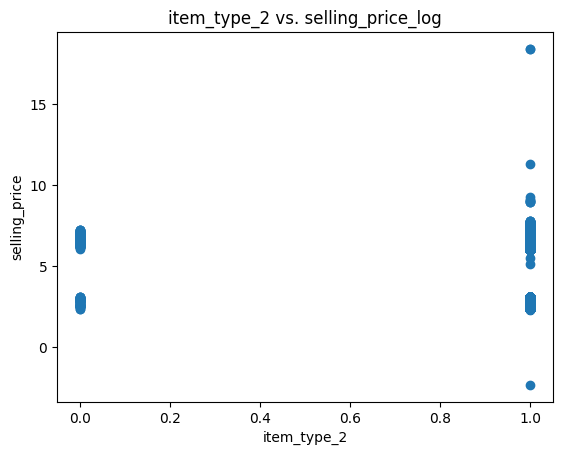

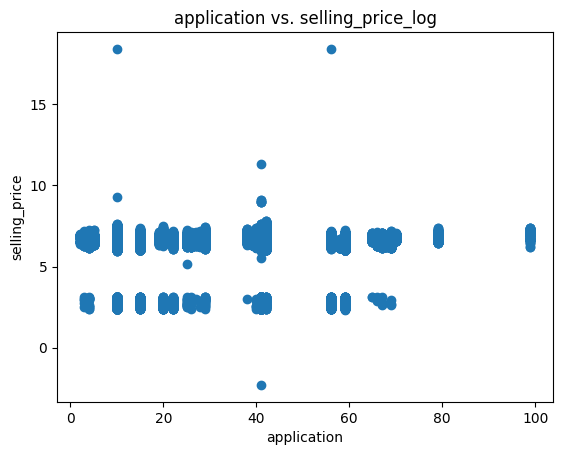

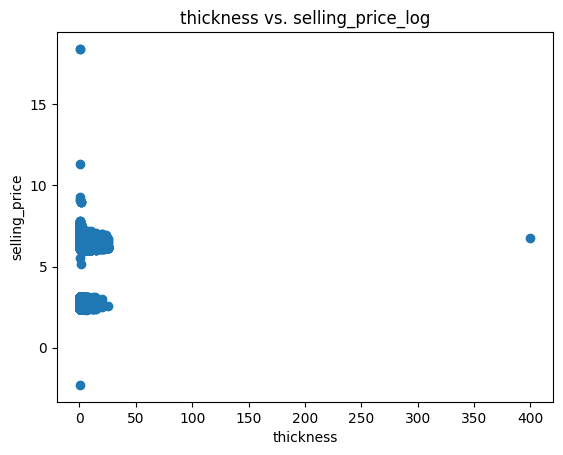

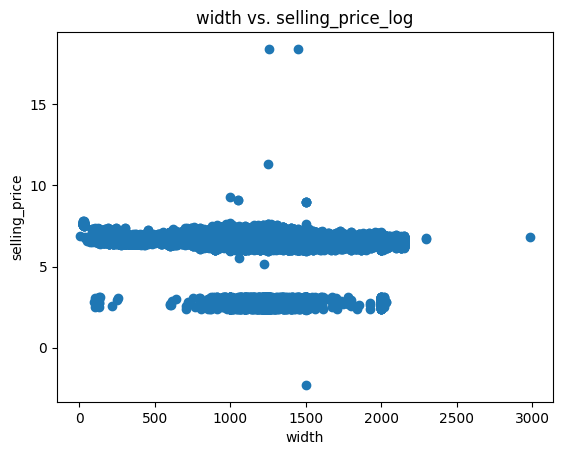

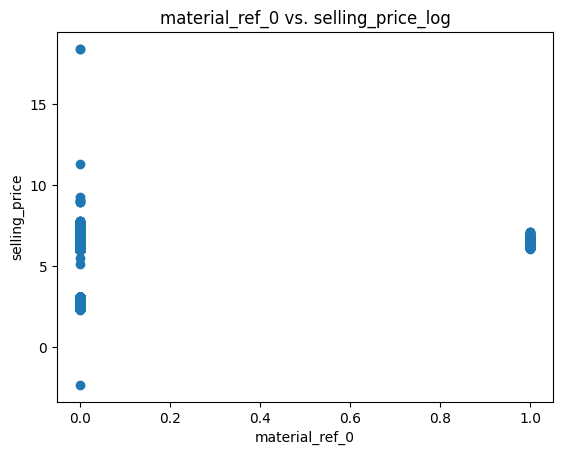

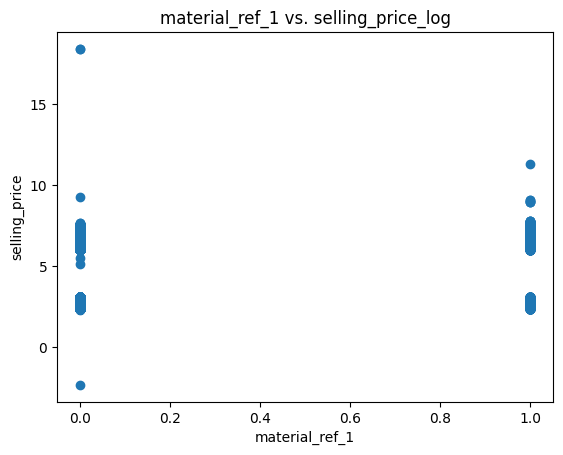

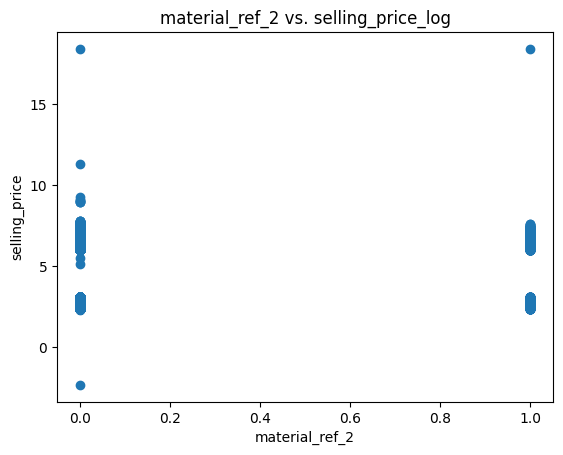

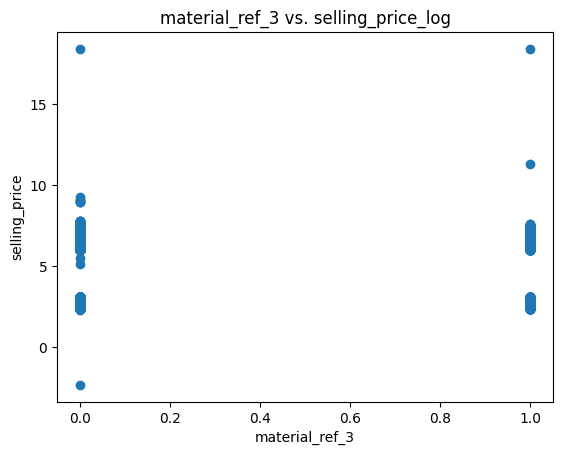

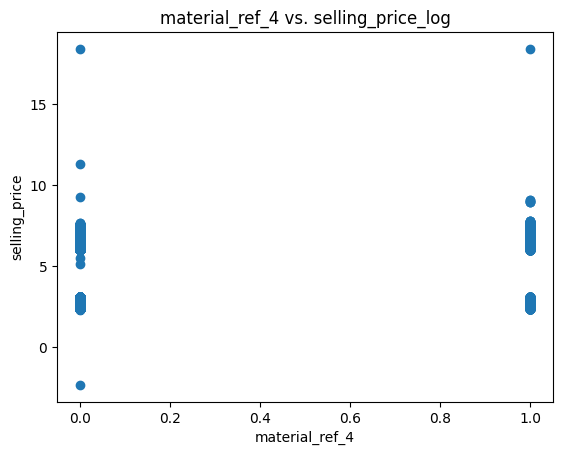

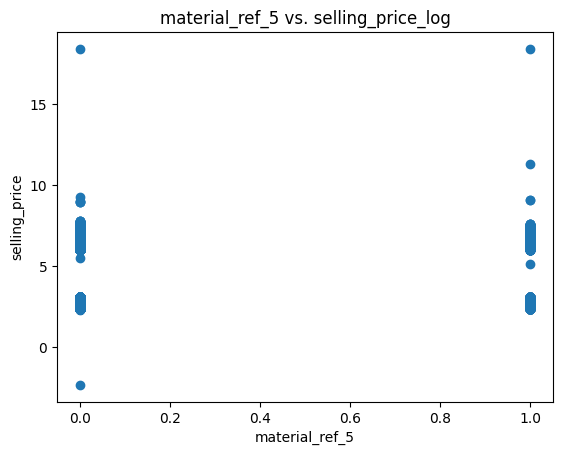

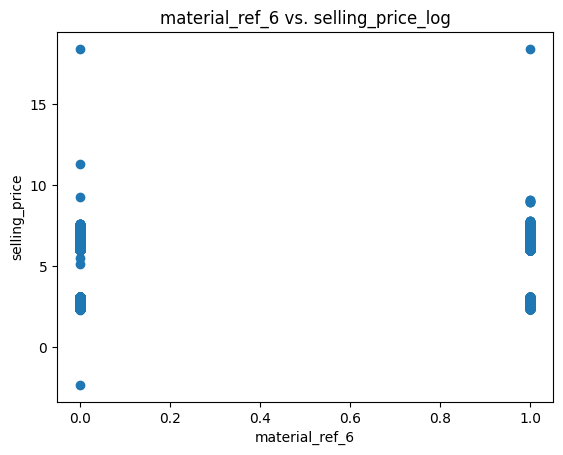

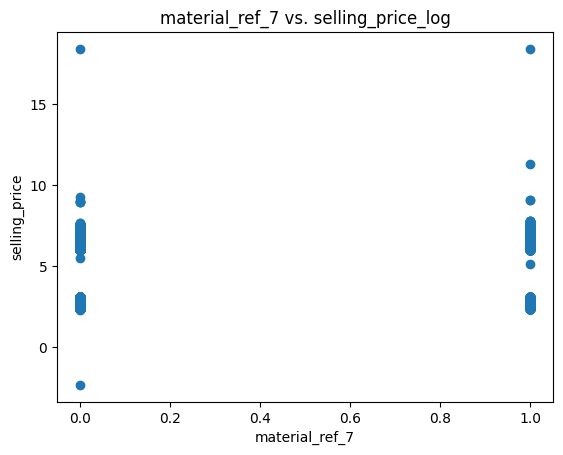

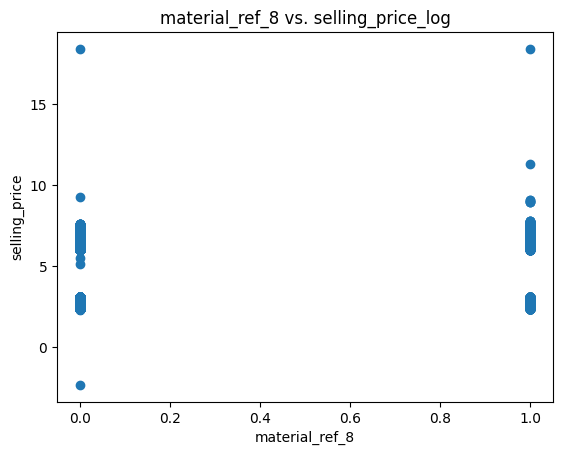

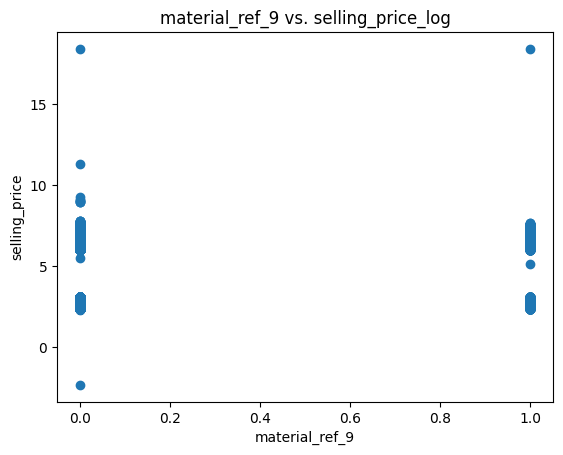

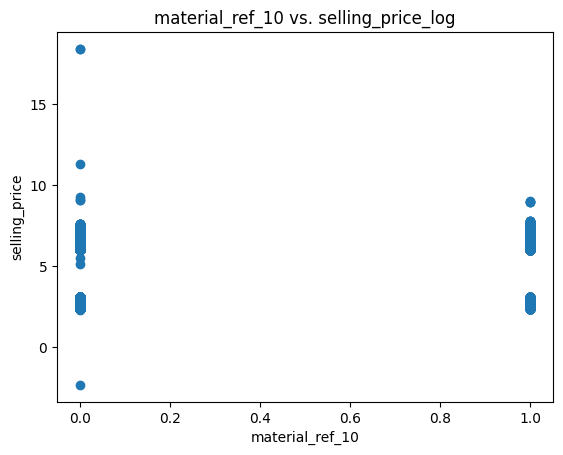

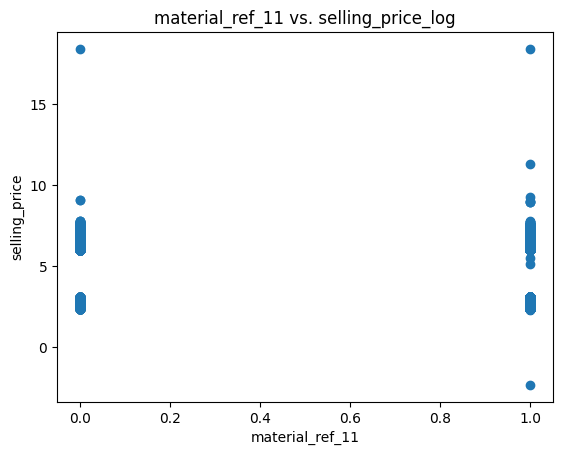

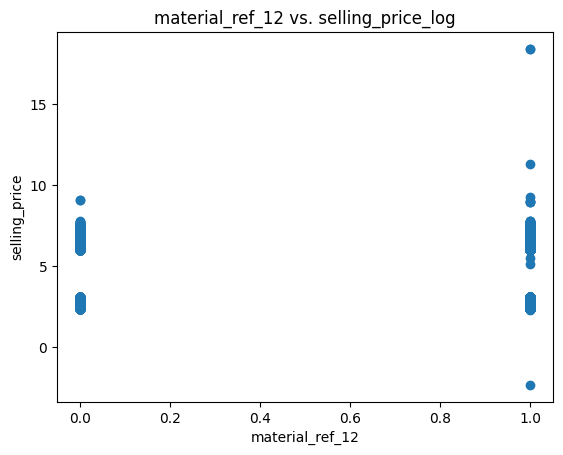

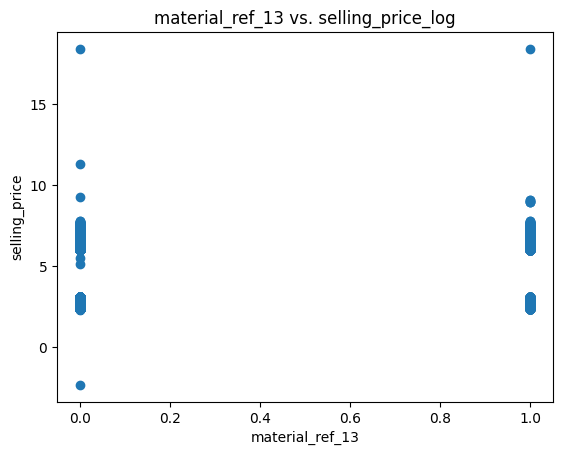

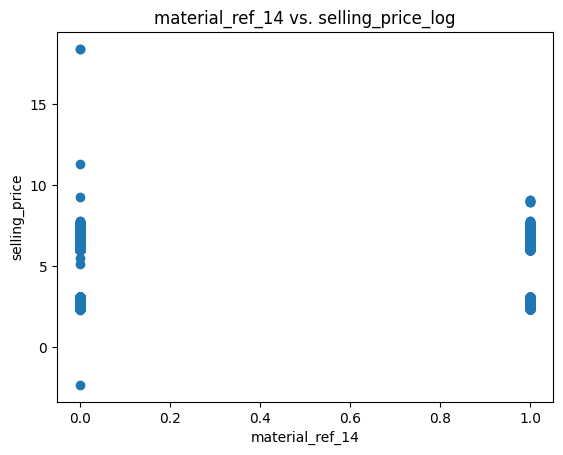

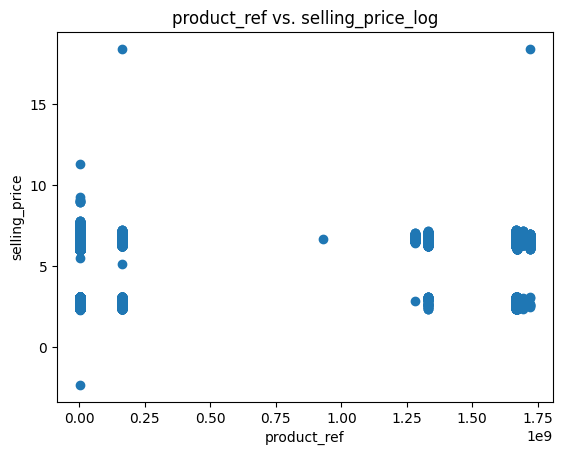

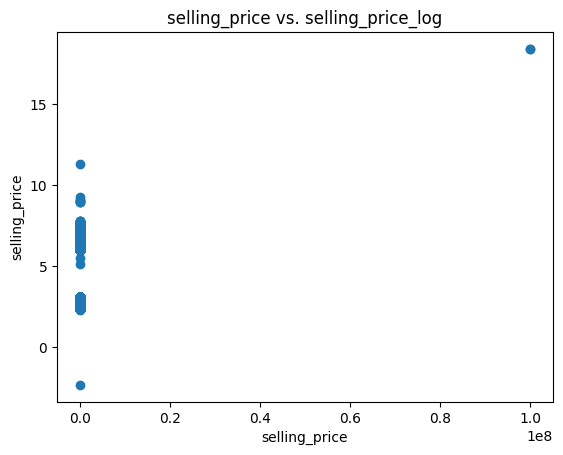

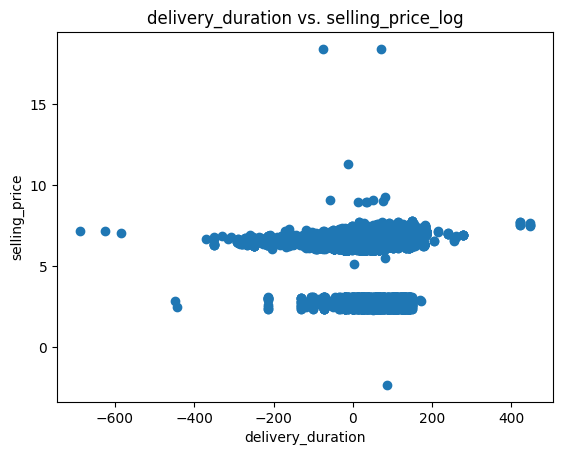

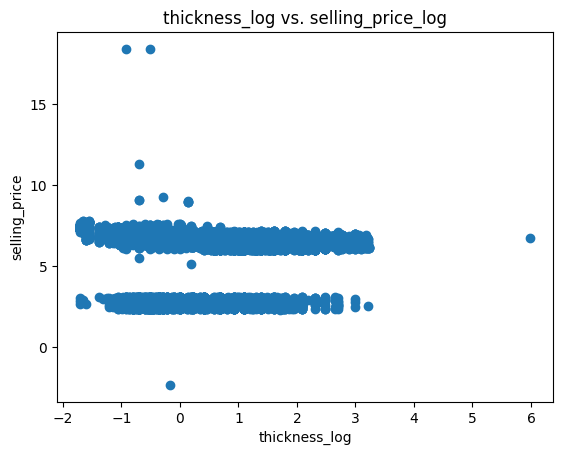

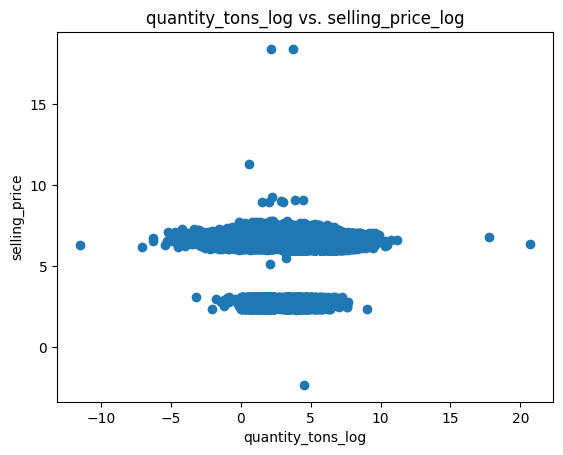

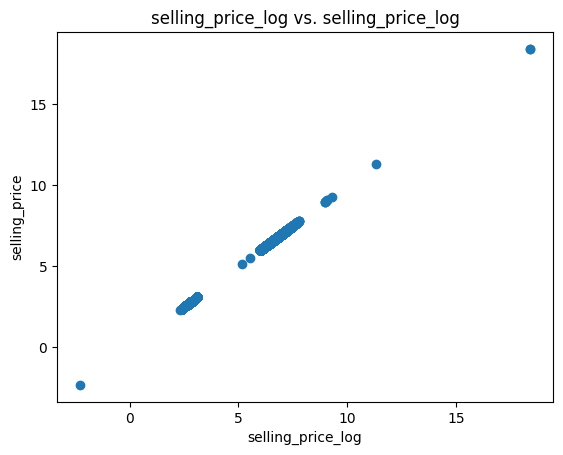

In [ ]:
for column in df_encoded.columns: # iterate over all columns except the last one (which is assumed to be the target variable)
    plt.scatter(df_encoded[column], df["selling_price_log"]) # plot the current input feature versus the target variable
    plt.xlabel(column) # set the x-axis label to the current input feature
    plt.ylabel("selling_price") # set the y-axis label to the target variable
    plt.title("{} vs. {}".format(column, "selling_price_log")) # set the title to include the names of the current input feature and target variable
    plt.show()

In [237]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150427 entries, 0 to 181672
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   quantity_tons      150427 non-null  float64
 1   customer           150427 non-null  int64  
 2   country            150427 non-null  float64
 3   item_type_0        150427 non-null  int64  
 4   item_type_1        150427 non-null  int64  
 5   item_type_2        150427 non-null  int64  
 6   application        150427 non-null  float64
 7   thickness          150427 non-null  float64
 8   width              150427 non-null  float64
 9   product_ref        150427 non-null  int64  
 10  selling_price      150427 non-null  float64
 11  delivery_duration  150427 non-null  int64  
 12  thickness_log      150427 non-null  float64
 13  quantity_tons_log  150427 non-null  float64
 14  selling_price_log  150427 non-null  float64
 15  status_enc         150427 non-null  int64  
dtypes:

### train_test_split

In [ ]:
df_encoded.head(2)

,quantity_tons,customer,country,status_0,status_1,status_2,status_3,item_type_0,item_type_1,item_type_2,...,material_ref_11,material_ref_12,material_ref_13,material_ref_14,product_ref,selling_price,delivery_duration,thickness_log,quantity_tons_log,selling_price_log
0,54.151139,30156308,28.0,0,0,0,1,0,0,1,...,0,0,0,1,1670798778,854.0,91,0.693147,3.991779,6.749931
1,768.024839,30202938,25.0,0,0,0,1,0,0,1,...,0,0,1,0,1668701718,1047.0,0,-0.223144,6.643822,6.953684


In [206]:
x=df_encoded.drop(["selling_price_log","selling_price","thickness","quantity_tons"],axis=1)
y=df_encoded["selling_price_log"]

In [207]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [208]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [ ]:
print(model.feature_importances_)

[8.46069089e-03 1.17535894e-02 2.18174627e-05 3.62624727e-03
 1.86890830e-01 6.27107361e-01 1.21806749e-03 4.05851471e-03
 2.18760425e-04 1.25678006e-02 5.05974483e-03 2.43814164e-04
 2.56014744e-03 3.59094403e-03 2.39527085e-03 2.11887988e-03
 1.96780067e-03 2.00279483e-03 1.79275439e-03 1.49461517e-03
 1.38682609e-03 1.13338138e-03 1.16276661e-03 9.41595062e-04
 8.89213550e-04 1.00607285e-03 1.85910193e-02 4.89446360e-02
 3.95421114e-02 7.25193145e-03]


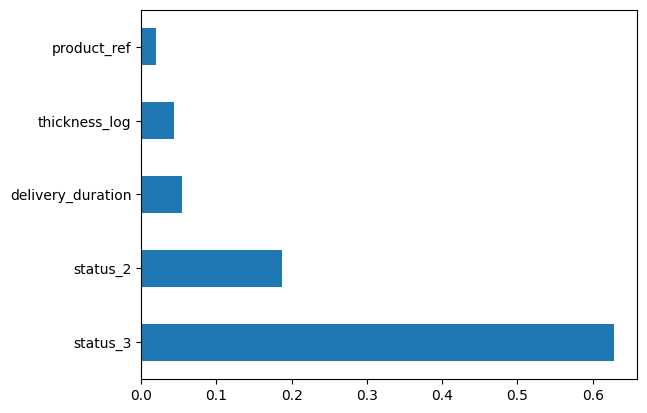

In [209]:
feat_importances=pd.Series(model.feature_importances_,index=x.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

* these are the five important features for setermining selling price of the copper.

## scaling the data

#### Training the model with scaled features.

In [210]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
ss=StandardScaler()
# x=df_encoded.drop(["quantity_tons","customer"],axis=1)
# y=df_encoded["selling_price_log"]
x_train_scaled=ss.fit_transform(x_train)
x_test_scaled=ss.transform(x_test)
rf_scaled=RandomForestRegressor()
model_scaled=rf_scaled.fit(x_train_scaled,y_train)
yy=model_scaled.predict(x_test_scaled)
score=r2_score(yy,y_test)
score

0.9744461696121058

In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import r2_score
# ss=StandardScaler()
# x=df_encoded.drop(["selling_price","quantity_tons","customer"],axis=1)
# y=df_encoded["selling_price"]
# x_train_scaled=ss.fit_transform(x_train)
# x_test_scaled=ss.transform(x_test)
# rf_scaled=RandomForestRegressor()
# model_scaled=rf_scaled.fit(x_train_scaled,y_train)
# yy=model_scaled.predict(x_test_scaled)
# score=r2_score(yy,y_test)
# score

#### Training the model without scaling

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
# x=df_encoded.drop(["quantity_tons_box","customer_box"],axis=1)
# y=df_encoded["selling_price_log"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
rf=RandomForestRegressor()
model1=rf.fit(x_train,y_train)
y_predict=model1.predict(x_test)
score1=r2_score(y_test,y_predict)
score1

0.9762308427311552

** we can see scaling is not playing important role in training tree based models.Both gave same results.

Training the model without transformed features

## Model fine tuning and cross validation

In [211]:
from sklearn.model_selection import GridSearchCV

In [212]:
parameters = {
    #'n_estimators': [45, 35],
    'max_depth': [15,20],
    'min_samples_split' : [2, 5, 10, 15, 100]
}
regr = RandomForestRegressor()

grid_search = GridSearchCV(regr, parameters,cv=5)
grid_search.fit(x_train,y_train)
best_model1 = grid_search.best_estimator_
best_model1.fit(x_train, y_train)

RandomForestRegressor(max_depth=20, min_samples_split=5)

In [213]:
y_pred_train = best_model1.predict(x_train)
y_pred = best_model1.predict(x_test)

score_test = r2_score(y_test, y_pred)
score_train = r2_score(y_train, y_pred_train)
print("train_score:", score_train)
print("test_score:", score_test )

train_score: 0.9889238875427863
test_score: 0.9740330345394834


#### we got 97% accuracy with transformed features.We will use this model for deployment.

#### Saving the model for future prediction

In [248]:
import pickle


# Save the encoding
with open("encoder_reg.pkl", "wb") as encoder_file:
    pickle.dump(encode_bin, encoder_file)

# Save the scaling
# Fit the scaler on the training data
with open("scaler_reg.pkl", "wb") as scaler_file:
    pickle.dump(ss, scaler_file)

# Save the trained model
with open("model_reg.pkl", "wb") as model_file:
    pickle.dump(best_model1, model_file)


# training the classifier

In [216]:
dff.drop("material_ref",axis=1,inplace=True)

In [217]:
dff.head(2)

,quantity_tons,customer,country,status,item_type,application,thickness,width,product_ref,selling_price,delivery_duration,thickness_log,quantity_tons_log,selling_price_log
0,54.151139,30156308,28.0,Won,W,10.0,2.0,1500.0,1670798778,854.0,91,0.693147,3.991779,6.749931
1,768.024839,30202938,25.0,Won,W,41.0,0.8,1210.0,1668701718,1047.0,0,-0.223144,6.643822,6.953684


In [218]:
won_count = (dff['status'] == 'Won').sum()
lost_count = (dff['status'] == 'Lost').sum()
won_count,lost_count

(115997, 34430)

In [219]:
class_counts = dff['status'].value_counts()

# Calculate the class distribution
class_distribution = class_counts / class_counts.sum()

# Print the class distribution
print("Class Distribution:")
print(class_distribution)


Class Distribution:
Won     0.771118
Lost    0.228882
Name: status, dtype: float64


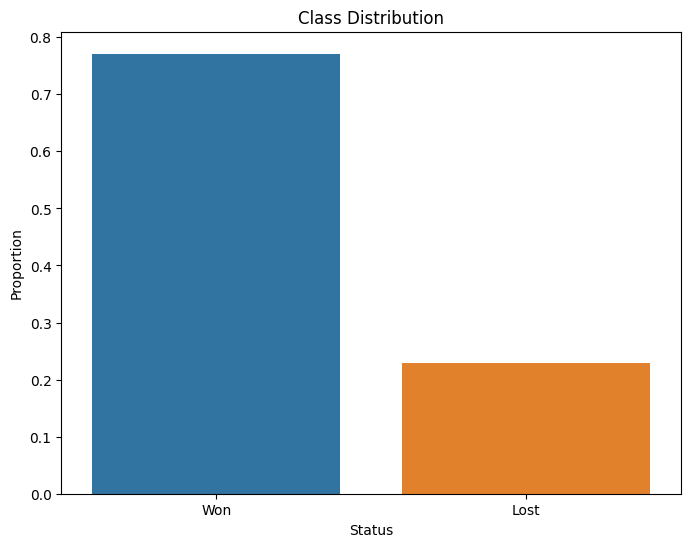

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(x=class_distribution.index, y=class_distribution.values)
plt.title("Class Distribution")
plt.xlabel("Status")
plt.ylabel("Proportion")
plt.show()


* it is an imbalanced data.
* creating two models:
1) make the data balanced and train the model.
2) training the imbalanced data with ensemble algorithm since it can handle imbalanced data.


In [220]:
dff["status_enc"]=dff.status.map({"Won":1,"Lost":0})
dff.drop(["status"],axis=1,inplace=True)

In [238]:
dff.head(2)

,quantity_tons,customer,country,item_type,application,thickness,width,product_ref,selling_price,delivery_duration,thickness_log,quantity_tons_log,selling_price_log,status_enc
0,54.151139,30156308,28.0,W,10.0,2.0,1500.0,1670798778,854.0,91,0.693147,3.991779,6.749931,1
1,768.024839,30202938,25.0,W,41.0,0.8,1210.0,1668701718,1047.0,0,-0.223144,6.643822,6.953684,1


In [239]:
data=dff.drop(["thickness","selling_price","status_enc","quantity_tons"],axis=1)

In [240]:
data.head(2)

,customer,country,item_type,application,width,product_ref,delivery_duration,thickness_log,quantity_tons_log,selling_price_log
0,30156308,28.0,W,10.0,1500.0,1670798778,91,0.693147,3.991779,6.749931
1,30202938,25.0,W,41.0,1210.0,1668701718,0,-0.223144,6.643822,6.953684


In [241]:
import category_encoders as ce
encoder_clf=ce.BinaryEncoder(cols=["item_type"],return_df=True)
df_encoded=encoder_clf.fit_transform(data)

In [225]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
X=df_encoded.drop(["status_enc","selling_price","thickness","quantity_tons"],axis=1)
y=df_encoded["status_enc"]
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Apply SMOTE for oversampling
smote = SMOTE(sampling_strategy="auto", random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Apply RandomUnderSampler for undersampling
rus = RandomUnderSampler(sampling_strategy="auto", random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

# Create and train DecisionTreeClassifier with SMOTE
model_smote = DecisionTreeClassifier(random_state=42)
model_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = model_smote.predict(X_test)
accuracy_smote = accuracy_score(y_test, y_pred_smote)

# Create and train DecisionTreeClassifier with RandomUnderSampler
model_rus = DecisionTreeClassifier(random_state=42)
model_rus.fit(X_train_rus, y_train_rus)
y_pred_rus = model_rus.predict(X_test)
accuracy_rus = accuracy_score(y_test, y_pred_rus)

print("Accuracy with SMOTE:", accuracy_smote)
print("Accuracy with RandomUnderSampler:", accuracy_rus)


Accuracy with SMOTE: 0.9434679713883054
Accuracy with RandomUnderSampler: 0.9149626399340548


In [226]:
from imblearn.pipeline import Pipeline

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X=df_encoded.drop(["status_enc","selling_price","thickness","quantity_tons"],axis=1)
y=df_encoded["status_enc"]
# Define resampling strategies
over = SMOTE(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.5)

# Define pipeline with over and under sampling steps
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# Transform the dataset using the pipeline
X_train_resampled, y_train_resampled = pipeline.fit_resample(X_train, y_train)

# Create and train DecisionTreeClassifier with resampled data
model = DecisionTreeClassifier(random_state=42)
clfr_resample=model.fit(X_train_resampled, y_train_resampled)
y_pred = clfr_resample.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy with combined resampling:", accuracy)


Accuracy with combined resampling: 0.9474565905283591


In [236]:
x.head()

,customer,country,status_0,status_1,status_2,status_3,item_type_0,item_type_1,item_type_2,application,width,product_ref,delivery_duration,thickness_log,quantity_tons_log
0,30156308,28.0,0,0,0,1,0,0,1,10.0,1500.0,1670798778,91,0.693147,3.991779
1,30202938,25.0,0,0,0,1,0,0,1,41.0,1210.0,1668701718,0,-0.223144,6.643822
2,30153963,30.0,0,0,0,1,0,1,0,28.0,952.0,628377,-90,-0.967584,5.956169
3,30349574,32.0,0,0,0,1,0,1,1,59.0,1317.0,1668701718,-90,0.832909,5.310301
4,30211560,28.0,0,0,0,1,0,0,1,10.0,2000.0,640665,-31,1.386294,6.666354


### training the model without resampling

In [228]:
from sklearn.model_selection import train_test_split
X=df_encoded.drop(["status_enc","selling_price","thickness","quantity_tons"],axis=1)
y=df_encoded["status_enc"]
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.25,random_state=42)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
tree=RandomForestClassifier()
model_tree=tree.fit(x_train,y_train)


In [229]:
y_pred=model_tree.predict(x_test)

In [230]:
accuracy_score(y_pred,y_test)

0.9417041153685928

### model fine tuning and cross validation

In [233]:
X=df_encoded.drop(["status_enc","selling_price","thickness","quantity_tons"],axis=1)
y=df_encoded["status_enc"]
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.25,random_state=42)
parameters = {
    #'criterion':['gini','entropy'],
    'max_depth': [15,20],
    'min_samples_split' : [2, 5, 10, 15, 100]
}
clfr=RandomForestClassifier()

rgcv_clf = GridSearchCV(clfr, parameters,cv=5)
model=rgcv_clf.fit(x_train,y_train)
best=model.best_estimator_
model_c=best.fit(x_train, y_train)

In [243]:
X.head(2)

,customer,country,item_type_0,item_type_1,item_type_2,application,width,product_ref,delivery_duration,thickness_log,quantity_tons_log,selling_price_log
0,30156308,28.0,0,0,1,10.0,1500.0,1670798778,91,0.693147,3.991779,6.749931
1,30202938,25.0,0,0,1,41.0,1210.0,1668701718,0,-0.223144,6.643822,6.953684


Precision: 0.9503544503206931
Recall: 0.9707704509143573
Confusion Matrix:
 [[21408  4412]
 [ 2543 84458]]
f1_score: 0.9604539691023534
accuracy_score: 0.9383536752909476


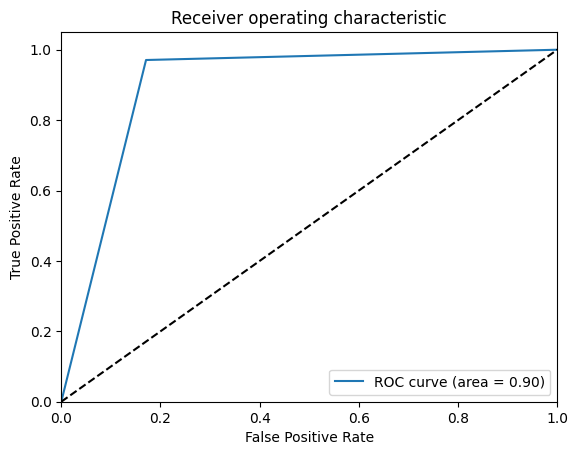

In [234]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix,f1_score,roc_curve, auc
y_pred=model_c.predict(x_test)
acc=accuracy_score(y_pred,y_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_score=f1_score(y_pred,y_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the results
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)
print("f1_score:",f1_score)
print("accuracy_score:",acc)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [242]:
with open("encoder_clf.pkl", "wb") as encoder_file:
    pickle.dump(encoder_clf, encoder_file)

#Save the trained model
with open("model_clf.pkl", "wb") as model_file:
    pickle.dump(best, model_file)